<a href="https://colab.research.google.com/github/Yuvraj-Karakoti/volcanic-eruption-project/blob/main/volcanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title** =
"Analysis of Global Volcanic Eruptions "

**Project Statement ** =
To explore historical volcanic eruption records and present meaningful insights through data analysis and visualization.

**Project Description** =
This project analyzes historical volcanic eruption events across the world.  
It uses a Kaggle dataset containing eruption details such as year, country, volcano name, magnitude (VEI), and fatalities.  
The goal is to identify eruption trends, most affected countries, deadliest eruptions, and eruption frequency over time.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('volcano-events.csv')

print(df.head())

     Year  Month  Day      Name            Location           Country  \
0     NaN    NaN  NaN       NaN                 NaN               NaN   
1 -4360.0    NaN  NaN  Macauley         Kermadec Is       New Zealand   
2 -4350.0    NaN  NaN     Kikai           Ryukyu Is             Japan   
3 -4050.0    NaN  NaN    Masaya           Nicaragua         Nicaragua   
4 -4000.0    NaN  NaN    Witori  New Britain-SW Pac  Papua New Guinea   

   Latitude  Longitude  Elevation (m)     Type  ...  Total Deaths  \
0       NaN        NaN            NaN      NaN  ...           NaN   
1   -30.210   -178.475          238.0  Caldera  ...           NaN   
2    30.793    130.305          704.0  Caldera  ...           NaN   
3    11.985    -86.165          594.0  Caldera  ...           NaN   
4    -5.576    150.516          724.0  Caldera  ...           NaN   

  Total Death Description  Total Missing  Total Missing Description  \
0                     NaN            NaN                        NaN   
1   

In [17]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                876 non-null    float64
 1   Month                               745 non-null    float64
 2   Day                                 685 non-null    float64
 3   Name                                876 non-null    object 
 4   Location                            876 non-null    object 
 5   Country                             876 non-null    object 
 6   Latitude                            876 non-null    float64
 7   Longitude                           876 non-null    float64
 8   Elevation (m)                       876 non-null    float64
 9   Type                                876 non-null    object 
 10  VEI                                 701 non-null    float64
 11  Agent                               514 non-n

In [18]:
df.shape

(877, 32)

In [19]:
if "Year" in df.columns:
    df["Year"].fillna(df["Year"].median(), inplace=True)

# Drop rows where 'Name' is missing
if "Name" in df.columns:
    df.dropna(subset=["Name"], inplace=True)



Statistical Summary:


,Year,Month,Day,Latitude,Longitude,Elevation (m),VEI,Deaths,Death Description,Missing,...,Total Deaths,Total Death Description,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description
count,876.000000,745.000000,685.000000,876.000000,876.000000,876.000000,701.000000,440.000000,568.000000,11.000000,...,462.000000,594.000000,11.000000,14.000000,102.000000,132.000000,26.000000,265.000000,53.000000,149.000000
mean,1730.413242,6.442953,15.274453,15.083737,52.822393,1956.087900,2.864479,441.675000,1.558099,340.090909,...,722.826840,1.612795,340.909091,2.000000,488.039216,1.500000,198.078154,1.784906,1008.396226,2.208054
std,717.583467,3.350458,9.086685,25.722580,101.185489,1257.480788,1.301716,2421.846221,0.966897,642.860864,...,4137.443373,1.003319,642.391696,1.176697,3303.758879,0.860499,425.089307,0.978441,1891.905941,1.060820
min,-4360.000000,1.000000,1.000000,-63.001000,-178.475000,-642.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1799.250000,4.000000,7.000000,-6.729500,-19.666000,1117.000000,2.000000,1.000000,1.000000,2.500000,...,2.000000,1.000000,6.000000,1.000000,3.000000,1.000000,3.673000,1.000000,24.000000,1.000000
50%,1922.000000,7.000000,15.000000,13.257000,110.446000,1718.000000,3.000000,5.000000,1.000000,44.000000,...,6.000000,1.000000,44.000000,1.500000,11.000000,1.000000,19.500000,1.000000,164.000000,2.000000
75%,1986.000000,9.000000,23.000000,36.406000,130.862000,2640.250000,4.000000,48.250000,2.000000,174.500000,...,60.000000,2.000000,174.500000,3.000000,42.750000,2.000000,118.750000,3.000000,800.000000,3.000000
max,2023.000000,12.000000,31.000000,65.715000,177.180000,6377.000000,7.000000,30000.000000,4.000000,1755.000000,...,60000.000000,4.000000,1755.000000,4.000000,31943.000000,4.000000,2000.000000,4.000000,9000.000000,4.000000


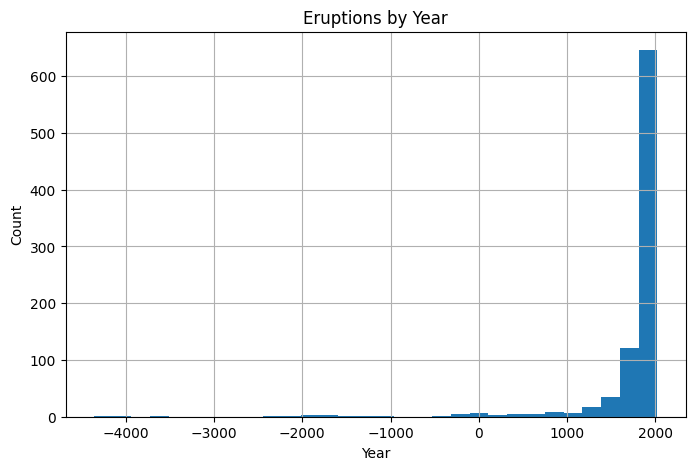

In [20]:
print("\nStatistical Summary:")
display(df.describe())

# Distribution of Year
if "Year" in df.columns:
    plt.figure(figsize=(8,5))
    df["Year"].hist(bins=30)
    plt.title("Eruptions by Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()


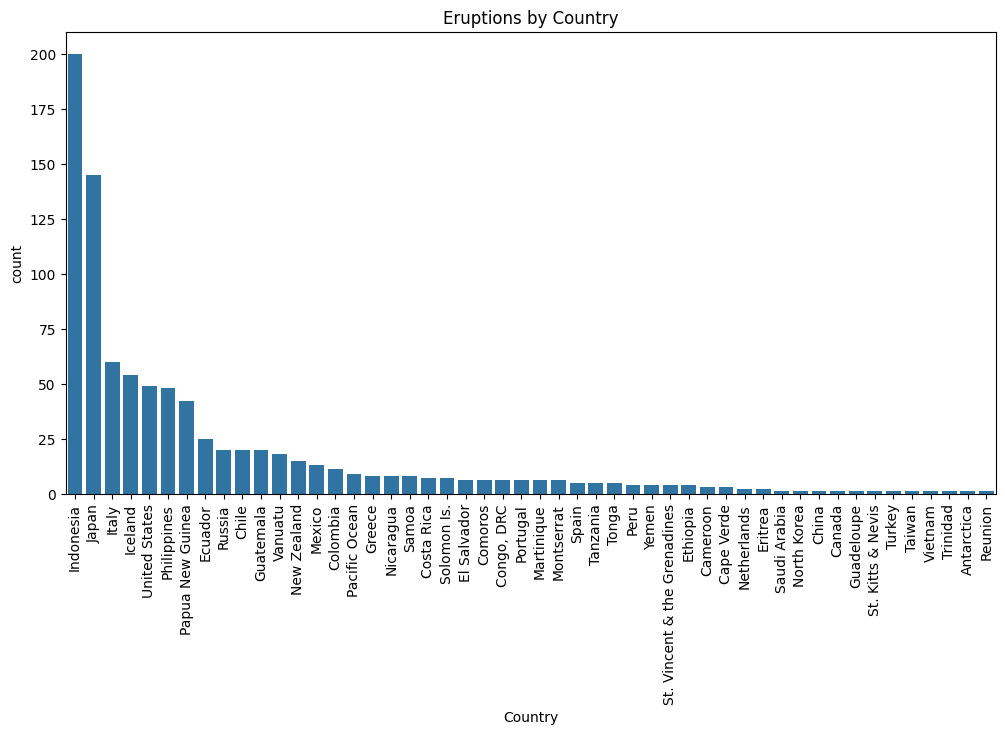

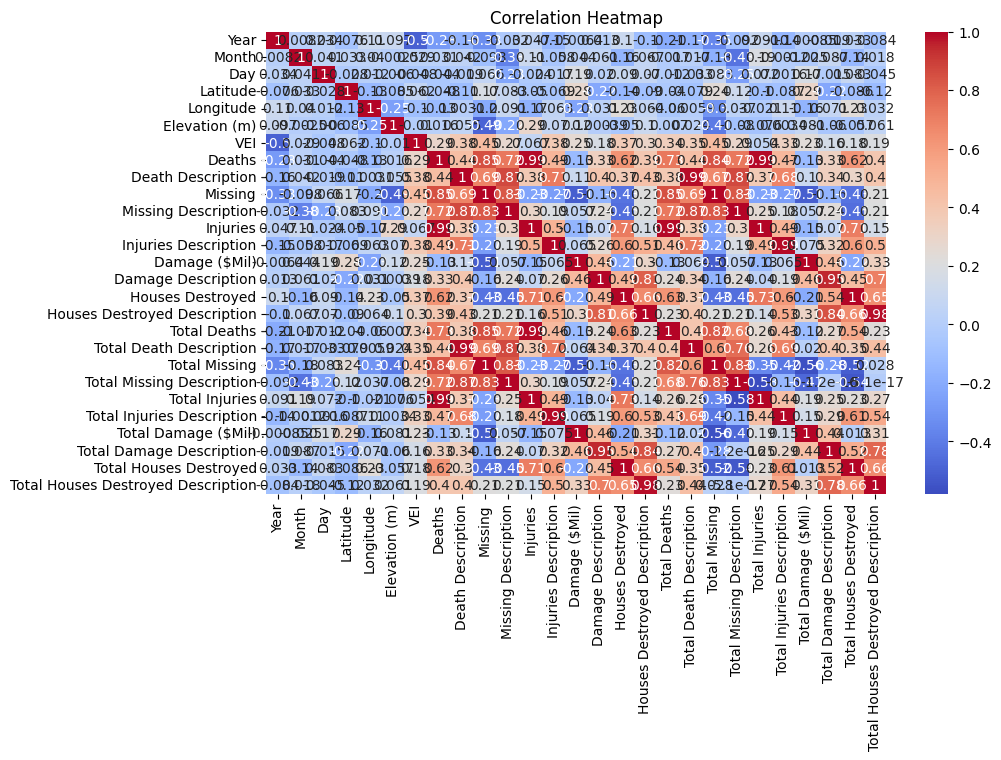

In [21]:
if "Country" in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x="Country", data=df, order=df["Country"].value_counts().index)
    plt.xticks(rotation=90)
    plt.title("Eruptions by Country")
    plt.show()

# Correlation heatmap (numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
if {"Year", "Month", "Day"}.issubset(df.columns):
    df["Date"] = pd.to_datetime(df[["Year","Month","Day"]].astype(str).agg("-".join, axis=1), errors="coerce")

# Encode categorical variables (example: Country)
if "Country" in df.columns:
    le = LabelEncoder()
    df["Country_encoded"] = le.fit_transform(df["Country"])

# Scale numeric features (example: Elevation)
if "Elevation" in df.columns:
    scaler = MinMaxScaler()
    df[["Elevation_scaled"]] = scaler.fit_transform(df[["Elevation"]])

In [23]:
if "Elevation" in df.columns:
    X = df.select_dtypes(include=[np.number]).drop(columns=["Elevation"])  # features
    y = df["Elevation"]  # target

    # Filter method: ANOVA F-test
    selector = SelectKBest(score_func=f_classif, k=5)
    X_new = selector.fit_transform(X.fillna(0), y)

    print("\nTop 5 Features (ANOVA F-test):")
    selected_features = X.columns[selector.get_support()]
    print(selected_features.tolist())

    rf = RandomForestClassifier(random_state=42)

    y_class = (y > y.median()).astype(int)
    rf.fit(X.fillna(0), y_class)

    feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nRandom Forest Feature Importance (Classification):")
    print(feature_importances)

    plt.figure(figsize=(8,5))
    feature_importances.head(10).plot(kind="barh")
    plt.title("Top Feature Importances (Random Forest)")
    plt.show()


In [24]:
if "Elevation" in df.columns and {"Year","Latitude","Longitude"}.issubset(df.columns):
    X = df[["Year","Latitude","Longitude"]].fillna(0)
    y = df["Elevation"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X_train, y_train)

    print("\nRandom Forest Regressor Results:")
    print("Training R^2 Score:", rf_reg.score(X_train, y_train))
    print("Test R^2 Score:", rf_reg.score(X_test, y_test))
